<a href="https://colab.research.google.com/github/HumbertoMezaRuiz/FisicaComputacional1/blob/main/Actividad7/Actividad7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy.linalg as la
from numpy.linalg import matrix_power as mpow

import matplotlib.pyplot as plt

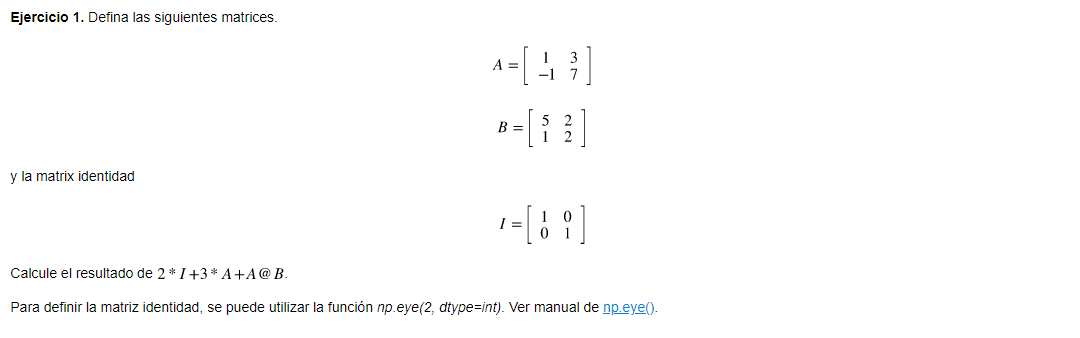

In [ ]:
## La matriz A
A = np.array([[1,3],[-1,7]])
print('A=', A)
## La matriz B
B = np.array([[5,2],[1,2]])
print('B=', B)
## La matriz identidad
I = np.eye(2)
print('I=', I)

A= [[ 1  3]
 [-1  7]]
B= [[5 2]
 [1 2]]
I= [[1. 0.]
 [0. 1.]]


In [ ]:
#Para realizar el cálculo de la ecuación 2*I +3*A +A@B hacemos 

Resultado = 2*I + 3*A + A@B
print('El resultado es', Resultado)



El resultado es [[13. 17.]
 [-1. 35.]]


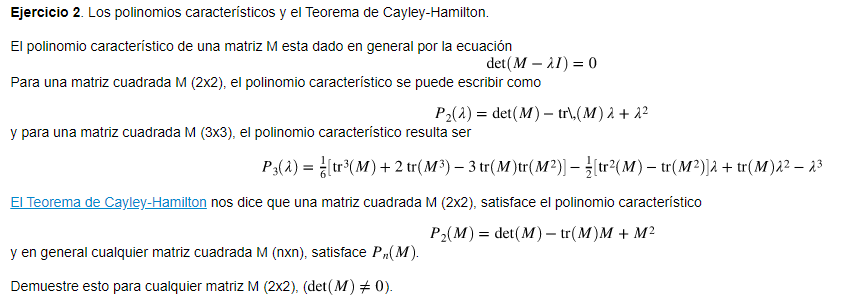

In [ ]:
## Usaremos la matriz M e I
M = np.array([[1,2],[3,4]])

## El polinomio será P2(X)=det(M)-diagonal(M)*X+X^2, los coeficientes son
print('det(M)=', la.det(M))
print('diagonal=', np.trace(M))

det(M)= -2.0
diagonal= 5


In [ ]:
## La ecuación será -2-5X+X^2
## Así, el polinomio matricial -2*I-5*M+M^2
Resultado2 = -2*I-5*M+M@M
print(Resultado2)

[[0. 0.]
 [0. 0.]]


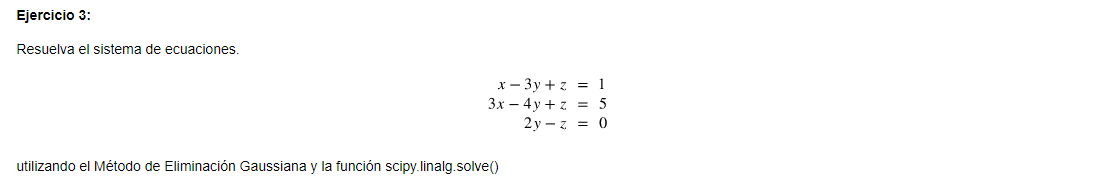

In [ ]:
# Implementación del método de eliminación Gaussiana
# Definimos 3 funciones 

# Intercambio de posición de renglones.
def switch_rows(A,i,j):
    "Intercambiar renglones i y j en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    E[i,i] = 0
    E[j,j] = 0
    E[i,j] = 1
    E[j,i] = 1
    return E @ A

# Multiplicar un renglón por una constante no nula.
def scale_row(A,k,i):
    "Multiplicar el renglón i por k en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    E[i,i] = k
    return E @ A

# Sumar un múltiplo de un reglon a otro renglón.
def add_row(A,k,i,j):
    "Sumar k veces el renglón j al renglón i en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    if i == j:
        E[i,i] = k + 1
    else:
        E[i,j] = k
    return E @ A

In [ ]:
## Definimos la matriz asociada al sistema de ecuaciones

M = np.array([[1,-3,1],[3,-4,1],[0,2,-1]])
print(M)

[[ 1 -3  1]
 [ 3 -4  1]
 [ 0  2 -1]]


In [ ]:
## La matriz aumentada

A = np.hstack([M,np.eye(3)])
print(A)

[[ 1. -3.  1.  1.  0.  0.]
 [ 3. -4.  1.  0.  1.  0.]
 [ 0.  2. -1.  0.  0.  1.]]


In [ ]:
## Comenzamos a utilizar el metodo gauss jordan

## Hacemos   L2-3*L1 ==> L2

A1 = add_row(A,-3,1,0)
print(A1)

[[ 1. -3.  1.  1.  0.  0.]
 [ 0.  5. -2. -3.  1.  0.]
 [ 0.  2. -1.  0.  0.  1.]]


In [ ]:
## Hacemos L3 - 2/5 * L2 ==> L3 
## y L1 + 3/5 * L2 ==> L1

A2_temp = add_row(A1, -2/5, 2, 1)
A2 = scale_row(A2_temp, 3/5, 1)
A2 = add_row(A2, 1, 0, 1)
print(A2)

[[ 1.   0.  -0.2 -0.8  0.6  0. ]
 [ 0.   3.  -1.2 -1.8  0.6  0. ]
 [ 0.   0.  -0.2  1.2 -0.4  1. ]]


In [ ]:
## Reescalamos el tercer renglon
A3_temp1 = scale_row(A2, -5,2)

## reescalamos el segundo
A3_temp2 = scale_row(A3_temp1, -1/1.2, 1)

## Hacemos L2 + 0.4 * L3 ==> L2
A3_temp3 = add_row(A3_temp2, 0.4, 1, 2)

## L1 + 0.2 * L3 ==> L1
A3_temp3 = add_row(A3_temp2, 0.2, 0, 2)

## L2 - L3 ==> L2
A3_temp3 = add_row(A3_temp3, -1, 1, 2)

## L2 ==> -1/2.5 * L2
A3 = scale_row(A3_temp3, -1/2.5, 1)

print(np.round(A3,2))

[[ 1.  0.  0. -2.  1. -1.]
 [ 0.  1. -0. -3.  1. -2.]
 [ 0.  0.  1. -6.  2. -5.]]


In [ ]:
## Definimos la inversa
M_inv = A3[:,3:]
print(M_inv)

[[-2.  1. -1.]
 [-3.  1. -2.]
 [-6.  2. -5.]]


In [ ]:
## checamos que sí corresponda 
print(np.round(M_inv@M,2))

[[ 1.  0.  0.]
 [-0.  1. -0.]
 [-0.  0.  1.]]


In [ ]:
## Obtenemos la inversa con la función
print(la.inv(M))

[[-2.  1. -1.]
 [-3.  1. -2.]
 [-6.  2. -5.]]


In [ ]:
## Definimos el vector resultado [1,5,0]
b = np.array([1,5,0])

## Hacemos M_inv @ b para obtener el resulado
print(np.round(M_inv @ b))

[3. 2. 4.]


In [ ]:
## Usando la función  scipy.linalg.solve resolvemos
x_sol = la.solve(M, b)
print(x_sol)

[3. 2. 4.]


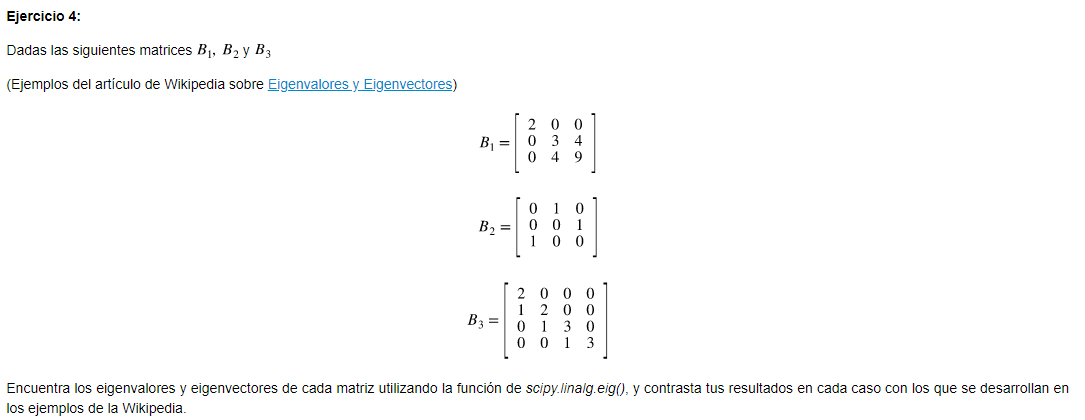

In [ ]:
## Definimos los vectores B1, B2, B3
B1 = np.array([[2,0,0],[0,3,4],[0,4,9]])
B2 = np.array([[0,1,0],[0,0,1],[1,0,0]])
B3 = np.array([[2,0,0,0],[1,2,0,0],[0,1,3,0],[0,0,1,3]])

print('B1:')
print(B1)
print('B2:')
print(B2)
print('B3:')
print(B3)

B1:
[[2 0 0]
 [0 3 4]
 [0 4 9]]
B2:
[[0 1 0]
 [0 0 1]
 [1 0 0]]
B3:
[[2 0 0 0]
 [1 2 0 0]
 [0 1 3 0]
 [0 0 1 3]]


In [ ]:
# Obtenemos los eigenvalores/vectores con la biblioteca scipy.linalg.eig()
eigvals1, eigvecs1 = la.eig(B1)
print('Eigenvalores B1:')
print(np.round(eigvals1,2))
print('Eigenvectores B1:')
print(np.round(eigvecs1,2))
print('             ')

eigvals2, eigvecs2 = la.eig(B2)
print('Eigenvalores B2:')
print(np.round(eigvals2,2))
print('Eigenvectores B2:')
print(np.round(eigvecs2,2))
print('             ')

eigvals3, eigvecs3 = la.eig(B3)
print('Eigenvalores B3:')
print(np.round(eigvals3,2))
print('Eigenvectores B1:')
print(np.round(eigvecs3,2))
print(eigvecs1)

Eigenvalores B1:
[11.+0.j  1.+0.j  2.+0.j]
Eigenvectores B1:
[[ 0.    0.    1.  ]
 [ 0.45  0.89  0.  ]
 [ 0.89 -0.45  0.  ]]
             
Eigenvalores B2:
[-0.5+0.87j -0.5-0.87j  1. +0.j  ]
Eigenvectores B2:
[[ 0.58+0.j   0.58-0.j  -0.58+0.j ]
 [-0.29+0.5j -0.29-0.5j -0.58+0.j ]
 [-0.29-0.5j -0.29+0.5j -0.58+0.j ]]
             
Eigenvalores B3:
[3.+0.j 3.+0.j 2.+0.j 2.+0.j]
Eigenvectores B1:
[[ 0.    0.    0.    0.  ]
 [ 0.    0.    0.58 -0.58]
 [ 0.    0.   -0.58  0.58]
 [ 1.   -1.    0.58 -0.58]]
[[ 0.          0.          1.        ]
 [ 0.4472136   0.89442719  0.        ]
 [ 0.89442719 -0.4472136   0.        ]]


In [ ]:
# Formamos la matriz de los eigenvectores
P1 = np.array([[0,0,1],[0.4472136,0.89442719,0],[0.89442713,-0.4472136,0]])
print('La matriz de eigenvectores de B1 es:')
print(P1)

La matriz de eigenvectores de B1 es:
[[ 0.          0.          1.        ]
 [ 0.4472136   0.89442719  0.        ]
 [ 0.89442713 -0.4472136   0.        ]]


In [ ]:
# La matriz de los eigenvalores en la diagonal la definimos con
D1 = np.diag((11,1,2))
print('La mariz diagonal de eigenvalores es:')
print(D1)

La mariz diagonal de eigenvalores es:
[[11  0  0]
 [ 0  1  0]
 [ 0  0  2]]


In [ ]:
# Calculamos M = P D P^{-1}
# Veremos que es la matriz B1

M = P1 @ D1 @ la.inv(P1)
print(M)

[[2.         0.         0.        ]
 [0.         3.00000014 4.00000024]
 [0.         3.99999997 8.99999986]]


In [ ]:
# Calculamos la potencia k=25 de B1
k=25
P1_inv = la.inv(P1)

print('La matriz de eigenvectores:')
print(P1)
print('La matriz inversa de P: ')
print(P1_inv)

La matriz de eigenvectores:
[[ 0.          0.          1.        ]
 [ 0.4472136   0.89442719  0.        ]
 [ 0.89442713 -0.4472136   0.        ]]
La matriz inversa de P: 
[[-0.          0.44721362  0.89442724]
 [-0.          0.89442718 -0.44721362]
 [ 1.          0.          0.        ]]


In [ ]:
# Ahora calculamos usando la propiedad de diagonalización de M
print(P1 @ D1**25 @ P1_inv)

[[ 3.35544320e+07  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -5.12702791e+17 -1.02540557e+18]
 [ 0.00000000e+00 -1.02540550e+18 -2.05081098e+18]]


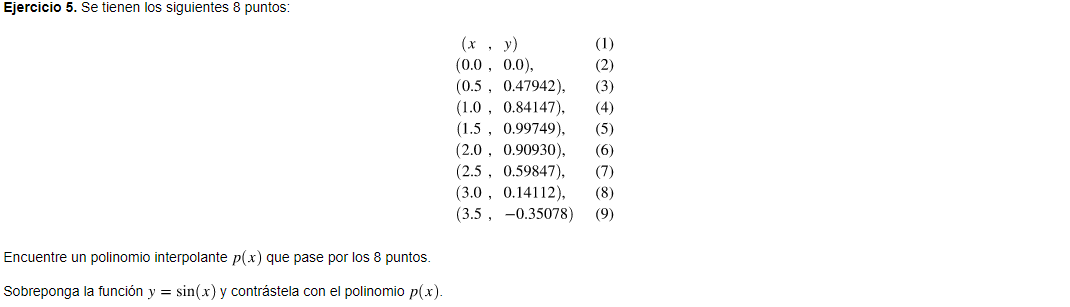

In [ ]:
## Como tenemos un total de 8 puntos realizaremos una interpolacion con un polinomio de grado 7 donde
x = np.array([0,0.5,1,1.5,2,2.5,3,3.5])
y = np.array([0,0.47942,0.84147,0.99749,0.90930,0.59847,0.14112,-0.35078]).reshape(8,1)

##Nuestra matriz para la variable x será
X = np.column_stack([x**k for k in range(0,8)])

## La solución para la ecuación Xa=y usando spicy.linalg==la
a = la.solve(X,y)
print(a)

[[ 0.00000000e+00]
 [ 1.00067181e+00]
 [-3.70788889e-03]
 [-1.58867889e-01]
 [-8.30222222e-03]
 [ 1.31964444e-02]
 [-1.54488889e-03]
 [ 2.46349206e-05]]


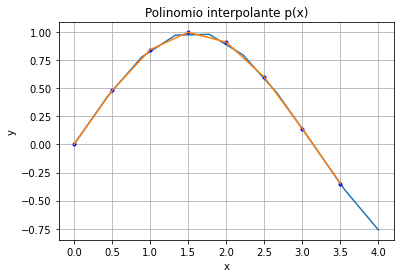

In [ ]:
#Graficamos los resultados del polinomio interpolante de coeficientes a[0], a[1], y a[2]
# Sobreponemos en la gráfica los puntos conocidos en azul con puntos ('b.')
xs = np.linspace(0,4,10)
ys_temp = 0
for k in range(0,8):
  ys = ys_temp + a[k]*xs**k
  ys_temp = ys
plt.plot(xs,ys,x,y,'b.', x, np.sin(x))
plt.grid()
plt.title('Polinomio interpolante p(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

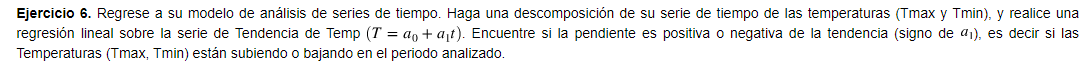

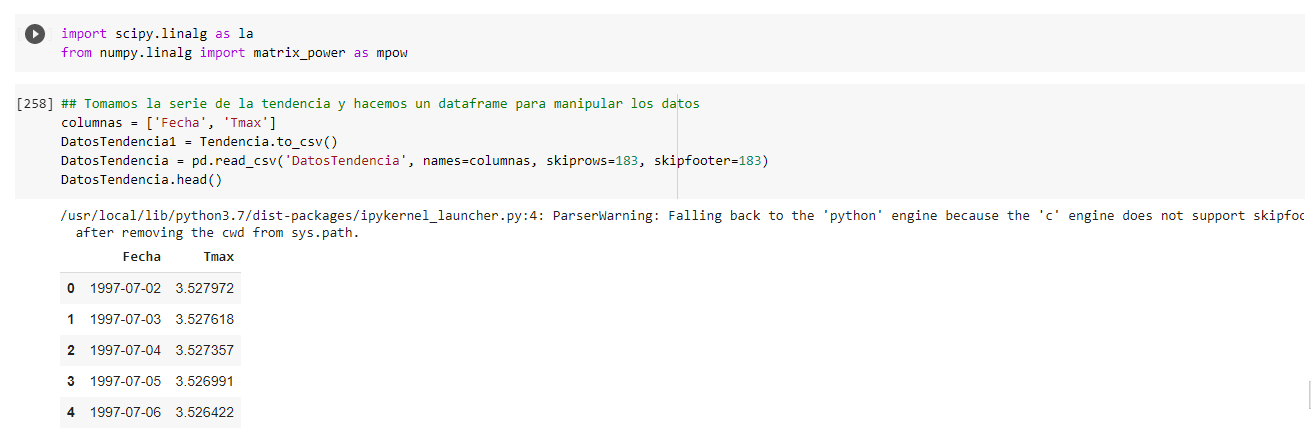

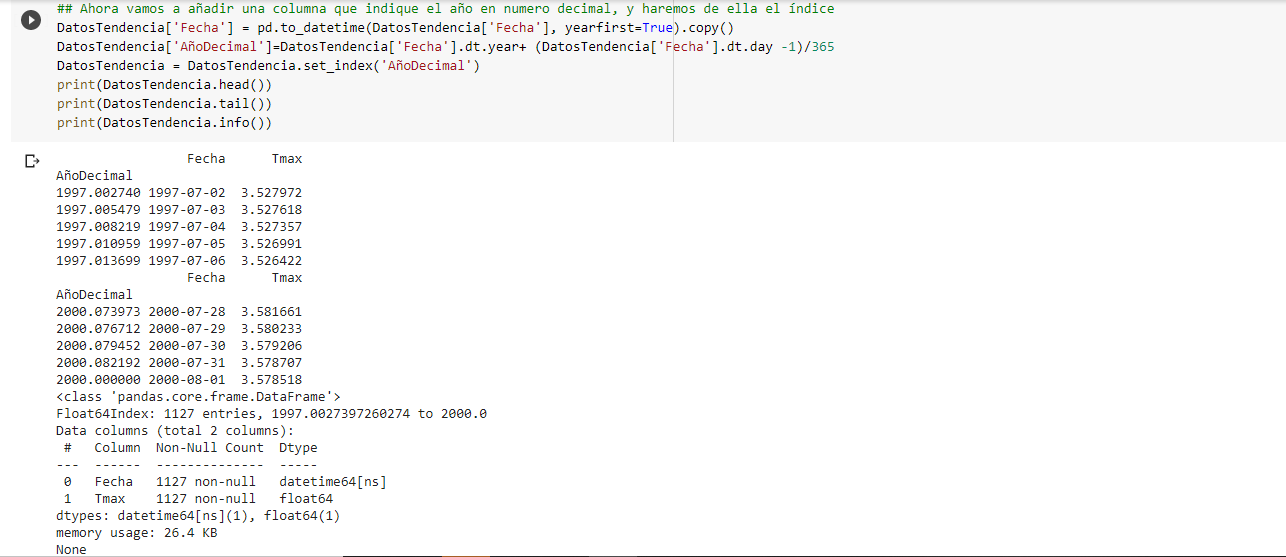

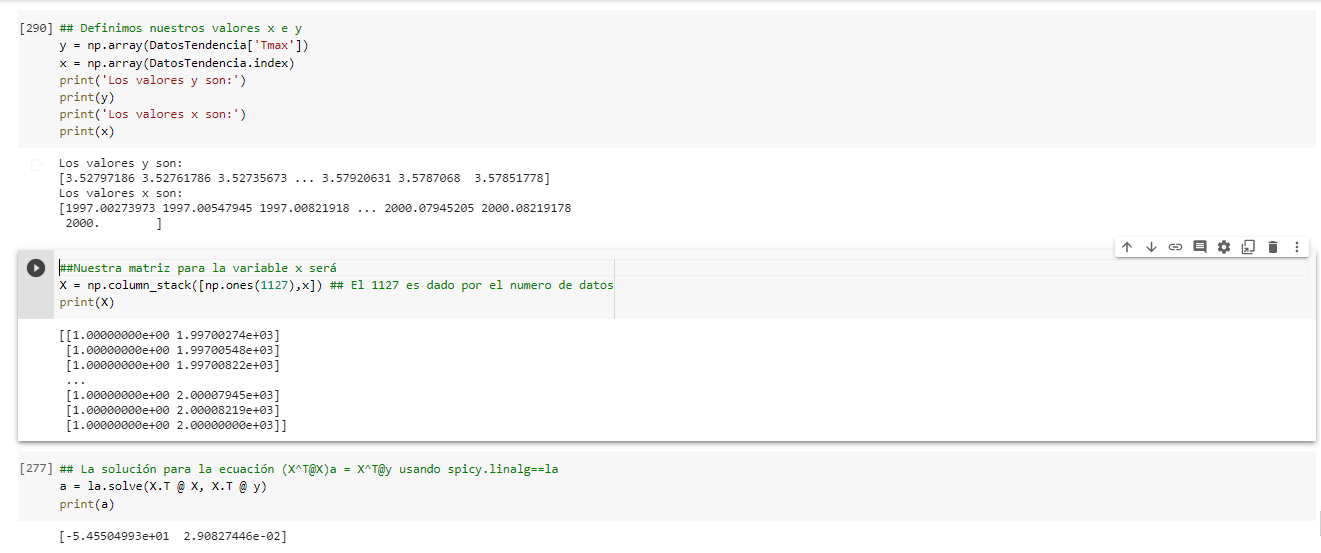

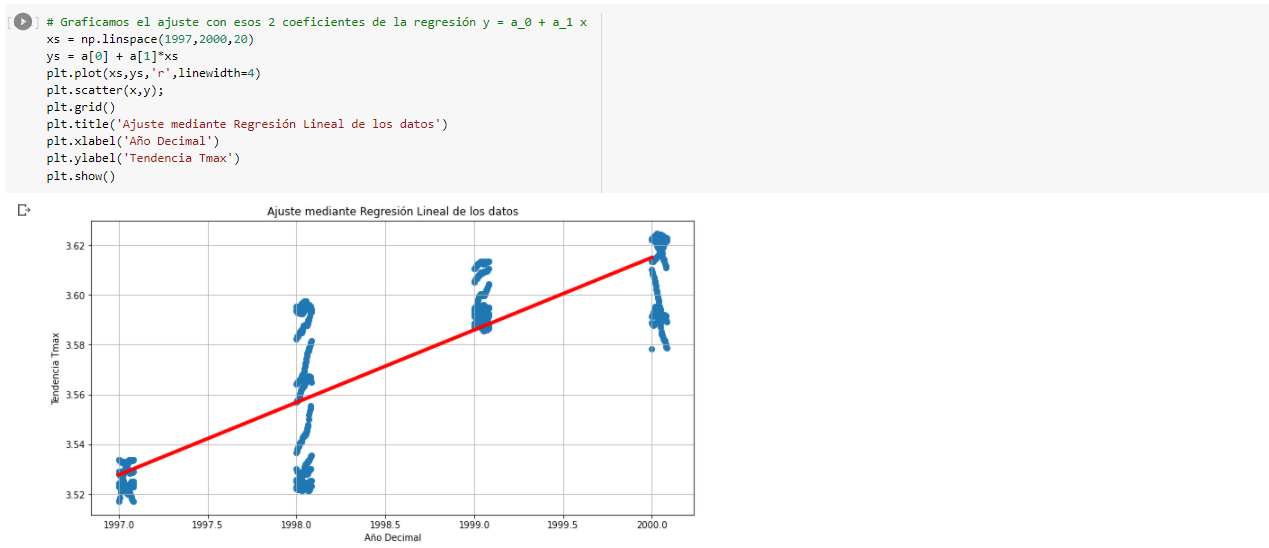